# Customer Clustering

<hr>

## Imports

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading Data

In [247]:
df = pd.read_csv("customer.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Preprocessing Data

In [248]:
from sklearn.preprocessing import LabelEncoder

df = df.drop("CustomerID", axis=1)
encoder = LabelEncoder()
df["Gender"] = encoder.fit_transform(df["Gender"])

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## Standardizing Data

In [249]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df)
standardData = scaler.transform(df)

standardData[:5]

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992]])

## Elbow Method to Choose K

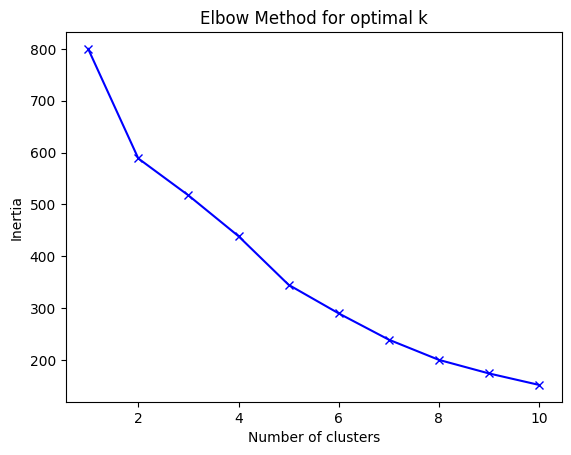

In [250]:
from sklearn.cluster import KMeans

inertia = []
K = range(1, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=40)
    km.fit(standardData)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for optimal k')
plt.show()

## Silhouette Method to Choose K

In [251]:
from sklearn.metrics import silhouette_score

for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=40)
    labels = km.fit_predict(standardData)
    score = silhouette_score(standardData, labels)
    print(f"k={k}, silhouette score={score:.3f}")

k=2, silhouette score=0.252
k=3, silhouette score=0.223
k=4, silhouette score=0.253
k=5, silhouette score=0.301
k=6, silhouette score=0.330


## K-Means Clustering

In [252]:
from sklearn.cluster import KMeans

k = 5
k_means = KMeans(n_clusters=k, init="k-means++", n_init=12, random_state=40)
k_means.fit(standardData)

labels = k_means.labels_
centers = k_means.cluster_centers_

print(f"Labels: {labels[:10]}")
print(f"Centers: {centers}")

df["K-Means Cluster"] = labels
df.head()

Labels: [0 0 4 4 4 4 4 4 3 4]
Centers: [[ 1.12815215 -0.77111419 -0.08465578  0.8197479 ]
 [-0.88640526  0.75798289  0.0706808  -0.52766874]
 [-0.71122636 -0.48536124  1.12370799  1.21089512]
 [ 1.12815215  0.75982983  0.07086791 -0.81492926]
 [-0.88640526 -0.86658278 -0.74086862  0.17566756]]


,Gender,Age,Annual Income (k$),Spending Score (1-100),K-Means Cluster
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,4
3,0,23,16,77,4
4,0,31,17,40,4


## Insights

In [253]:
cluster_summary = df.groupby("K-Means Cluster").mean()
print(cluster_summary)

                   Gender        Age  Annual Income (k$)  \
K-Means Cluster                                            
0                1.000000  28.105263           58.342105   
1                0.000000  49.411765           62.411765   
2                0.086957  32.086957           90.000000   
3                1.000000  49.437500           62.416667   
4                0.000000  26.775000           41.150000   

                 Spending Score (1-100)  
K-Means Cluster                          
0                             71.315789  
1                             36.607843  
2                             81.391304  
3                             29.208333  
4                             54.725000  


## Plot

Text(0, 0.5, 'Annual Income')

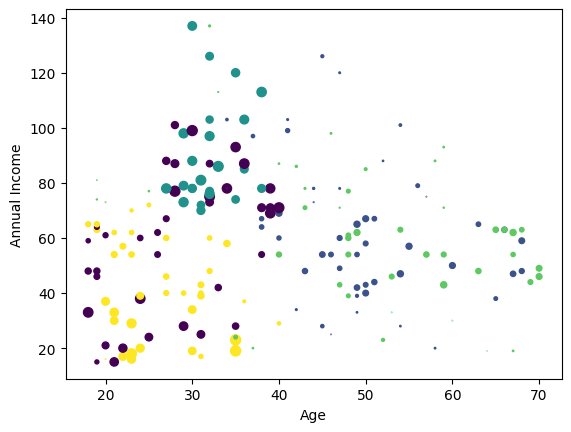

In [254]:
scores = df["Spending Score (1-100)"]
areas = np.pi * ((scores / 24) ** 2)

plt.scatter(df["Age"], df["Annual Income (k$)"], s=areas, c=labels.astype(np.float64))
plt.xlabel("Age")
plt.ylabel("Annual Income")

## 3D Plot

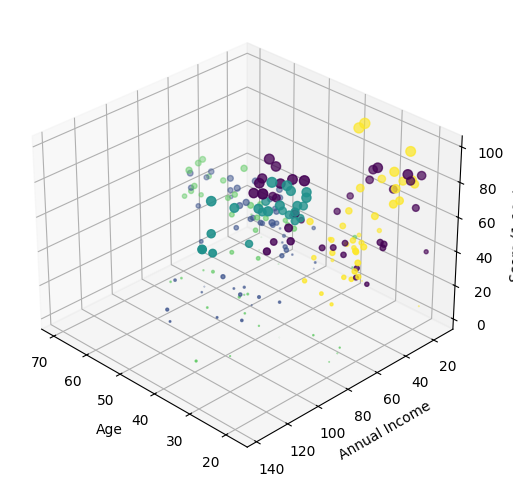

In [255]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.view_init(elev=30, azim=135)

ax.scatter(df["Age"], df["Annual Income (k$)"], df["Spending Score (1-100)"], s=areas, c=labels.astype(np.float64))
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income")
ax.set_zlabel("Score (1-100)")

plt.show()